In [201]:
import numpy as np

Synthetic Data

In [202]:
a = np.random.normal(0,1,(3,2))

In [203]:
print(a)

[[-1.95289327  0.91697519]
 [ 0.32547164  0.07174387]
 [-0.48456005  0.62345961]]


In [204]:
rank = np.linalg.matrix_rank(a)

In [205]:
print(rank)

2


Generation of Dataset #1

In [206]:
v = np.random.normal(0,1,(2,500))

In [207]:
x = np.matmul(a,v)

In [208]:
x.shape

(3, 500)

In [209]:
v.shape

(2, 500)

In [210]:
rank = np.linalg.matrix_rank(x)

In [211]:
print(rank)

2


Singular Value and Eigenvalue Decomposition of Dataset #1

In [212]:
xsvd = np.linalg.svd(x)

In [213]:
xeig = np.linalg.eig(np.matmul(x,np.transpose(x)))

In [214]:
np.matmul(x,np.transpose(x))

array([[2260.48721696, -276.74947247,  737.16708676],
       [-276.74947247,   54.66131172,  -53.6150751 ],
       [ 737.16708676,  -53.6150751 ,  304.98971405]])

In [215]:
print(xsvd[0])#singular vectors

[[-0.94286524  0.21043615 -0.25830557]
 [ 0.11182027 -0.53044775 -0.8403103 ]
 [-0.31384927 -0.82118318  0.47660972]]


In [216]:
print(xsvd[1])#singular values

[5.03853916e+01 9.02499618e+00 1.82848209e-15]


In [217]:
print(xeig[1]) #Eigenvectors(corresponds to vectors)

[[-0.94286524  0.25830557 -0.21043615]
 [ 0.11182027  0.8403103   0.53044775]
 [-0.31384927 -0.47660972  0.82118318]]


In [218]:
print(xeig[0])#eigenvalues

[ 2.53868769e+03 -3.44155750e-14  8.14505560e+01]


In [219]:
print(np.square(xsvd[1]))#square singular values corresponds to eigenvalues

[2.53868769e+03 8.14505560e+01 3.34334677e-30]


In [220]:
np.linalg.norm(x)**2 #energy

2620.1382427316416

In [221]:
(np.square(xsvd[1][0])+np.square(xsvd[1][1])+np.square(xsvd[1][2]))#square of sum of singular values equivalent to energy

2620.138242731643

The singular values are not exactly zero since the calculations using SVD may have limitations of significant digits.  Yet, the vaue going to e-30 is small enough for us in this regard to refer to it as 0.

PCA of Dataset #1

You would need 2 principal components since there are 2 non-zero eigenvalues.  This means that the dimensionality of the data can be reduced and still retain identical data.

Each of the values used in the matrix X come from the gaussian distribution where the mean is 0.  Due to law of large numbers, the mean of a data set will approach its expected value as more independed data is added.  Since the expected value of the gaussian distribution is 0, the mean of the dataset should be around 0. 

In [222]:
np.mean(x[0]),np.mean(x[1]),np.mean(x[2])#mean of each X coordinate

(0.07153948568590487, 0.014182003890398892, 0.0637761466601895)

In [223]:
mat1 = np.array([[xsvd[0][0][0],xsvd[0][0][1]],[xsvd[0][1][0],xsvd[0][1][1]],[xsvd[0][2][0],xsvd[0][2][1]]])#top 2 PC are include eigenvectors associated with 2 biggest eigenvalues

In [224]:
print(mat1)

[[-0.94286524  0.21043615]
 [ 0.11182027 -0.53044775]
 [-0.31384927 -0.82118318]]


In [225]:
mat1.shape

(3, 2)

In [226]:
y = np.matmul(np.transpose(mat1),x) #Project data onto PC

In [227]:
xi = np.matmul(mat1,y) #Recompute  original matrix

In [228]:
np.linalg.norm(xi-x)#representation error(square rooted)

3.990985223738998e-14

In [229]:
tempmat = np.array([[xeig[1][0][0]],[xeig[1][1][0]],[xeig[1][2][0]]])

In [230]:
print(tempmat) #vector associating with highest eigenvalue

[[-0.94286524]
 [ 0.11182027]
 [-0.31384927]]


In [231]:
xxi = np.matmul(np.transpose(tempmat),x)#project data onto vector

In [232]:
xxirec = np.matmul(tempmat,xxi)#reconstruct original data

In [233]:
np.linalg.norm(xxirec-x)**2 #representation error

81.45055598156425

In [234]:
xsvd[1][1]**2 #squared second biggest singular value similiar to representation error

81.45055598156418

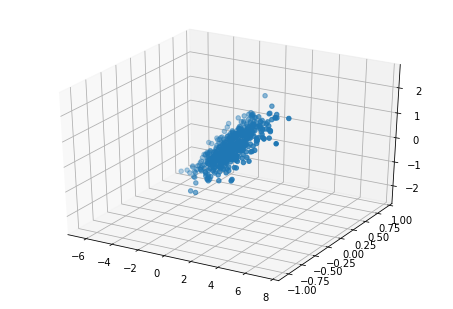

In [235]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x[0],x[1],x[2])
plt.show()

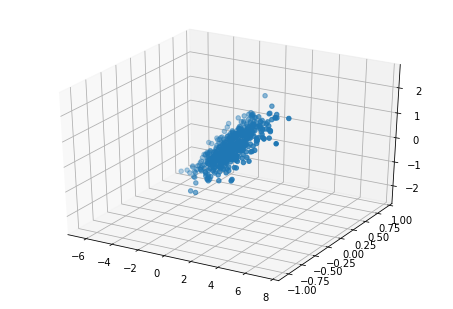

In [236]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(xi[0],xi[1],xi[2])
plt.show()

Generation of Dataset #2

In [237]:
c = np.random.normal(0,3,(3,500))

In [238]:
v = np.random.normal(0,1,(2,500))

In [239]:
x = np.matmul(a,v)+c

In [240]:
np.linalg.matrix_rank(x)

3

PCA, Centering, and Dataset #2

In [241]:
xsvd = np.linalg.svd(x)

In [242]:
xsvd[0]

array([[-0.95075388,  0.22769582, -0.21028949],
       [ 0.04162127, -0.57853278, -0.81459652],
       [-0.30713958, -0.78323332,  0.5405653 ]])

In [243]:
xsvd[1]

array([84.66218348, 67.94055675, 62.93999306])

In [244]:
b = np.array([[xsvd[0][0][0],xsvd[0][0][1]],[xsvd[0][1][0],xsvd[0][1][1]],[xsvd[0][2][0],xsvd[0][2][1]]])#Create matrix with PC of SVD

In [245]:
z = np.matmul(b,np.matmul(np.transpose(b),x))

In [246]:
np.linalg.norm(z-x)

62.93999306180469

In [247]:
f = [[np.mean(x[0])],[np.mean(x[1])],[np.mean(x[2])]]#Mean Vector

In [248]:
xok = x - f #Subtract mean vector from x

In [249]:
i = np.matmul(np.matmul(b,np.transpose(b)),xok) + f #Computer new x

In [250]:
np.linalg.norm(x-i)

62.795073403263814

Generation of Dataset #3

In [251]:
n = np.random.normal(0,0.01,(3,500))

In [252]:
v = np.random.normal(0,1,(2,500))

In [253]:
x = np.matmul(a,v) + n

In [254]:
xne = [i/np.linalg.norm(n) for i in x]

In [255]:
np.linalg.matrix_rank(xne) #Rank 3 due to noise

3

In [256]:
o = np.linalg.svd(xne)

In [257]:
o[1] #Singular Values

array([123.22009316,  21.74300583,   0.562752  ])

PCA Denoising of Dataset #3

In [258]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

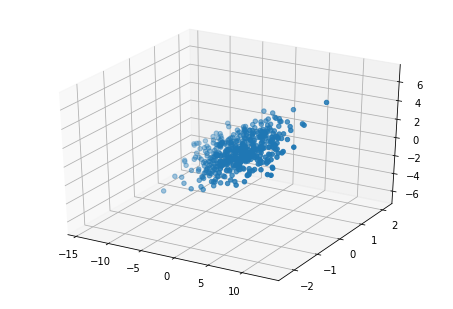

In [259]:
fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(xne[0],xne[1],xne[2])
pyplot.show()

In [260]:
m = np.linalg.svd(xne)

In [261]:
m[0]

array([[-0.94175382,  0.21557799, -0.2581199 ],
       [ 0.10890572, -0.53067061, -0.84055235],
       [-0.31818123, -0.81970411,  0.4762834 ]])

In [262]:
m[1]

array([123.22009316,  21.74300583,   0.562752  ])

In [263]:
mn = np.array([[m[0][0][0],m[0][0][1]],[m[0][1][0],m[0][1][1]],[m[0][2][0],m[0][2][1]]])

In [264]:
newm = np.matmul(mn,np.matmul(np.transpose(mn),xne))

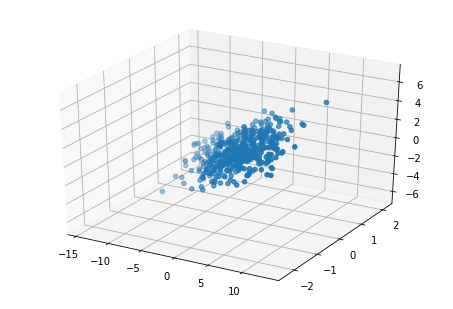

In [265]:
fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(newm[0],newm[1],newm[2])
pyplot.show()

In [266]:
np.linalg.norm(newm-xne) #since norm square roots, it will be the same as m[1][2]

0.5627520023702214

In [267]:
m[1][2]

0.5627520023702214

Real Data

In [268]:
from sklearn.datasets import load_digits
images, labels = load_digits(1, return_X_y=True)

In [269]:
transimage = np.transpose(images)

In [270]:
t = Matrix = [[0 for x in range(8)] for y in range(8)] 
for i in range(8): 
    for j in range(8): 
        t[i][j] = imagestrans[i+j][0]

t = Matrix = [[0 for x in range(8)] for y in range(8)]
for i in range(8):
    for j in range(8):
        t[i][j] = imagestrans[i+j][0]

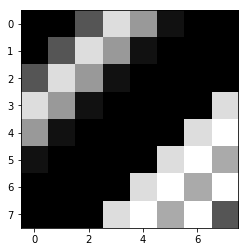

In [271]:
plt.imshow(t, cmap='gray')
plt.show()

In [272]:
images[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [273]:
mean = transimage.mean(axis=1)

In [274]:
mean.shape

(64,)

In [275]:
t = Matrix = [[0 for x in range(8)] for y in range(8)] 
for i in range(8): 
    for j in range(8): 
        t[i][j] = mean[i+j]

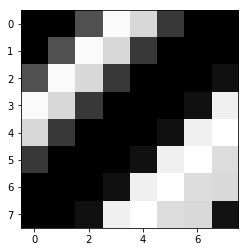

In [276]:
plt.imshow(t, cmap='gray')
plt.show()

In [277]:
g = images - mean

In [278]:
r = np.linalg.svd(g)

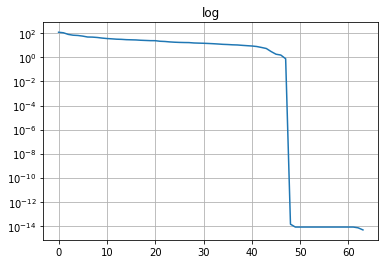

In [280]:
plt.plot(r[1])
plt.yscale('log')
plt.title('log')
plt.grid(True)
plt.show()

In [281]:
k = 0
total = 0
while (np.linalg.norm(g)**2)*0.9>total:
    total = total + r[1][k]**2
    k = k + 1
print(k)

18


In [284]:
r[0][0:18]

array([[ 0.05087897, -0.0587426 , -0.00782984, ...,  0.        ,
         0.        ,  0.        ],
       [-0.03994787, -0.06004084,  0.1468636 , ...,  0.05147383,
        -0.04470726,  0.03458818],
       [-0.09448662,  0.00152048,  0.03267081, ...,  0.10409827,
        -0.03781763, -0.05782813],
       ...,
       [-0.08587732,  0.12914793, -0.04702785, ..., -0.01476723,
        -0.01408782, -0.00170863],
       [-0.07999417, -0.06535242, -0.08452191, ..., -0.00841688,
         0.01014011, -0.02081912],
       [-0.03200951, -0.04316269, -0.05735308, ..., -0.00819963,
        -0.13487256, -0.06747376]])